In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cv2
from matplotlib import rcParams

In [8]:
rcParams['font.family']='Times New Roman'

In [13]:
tones = np.load('./results/tone_HSVs.npy', allow_pickle=True)
tones[0] = np.array([v for i, v in enumerate(tones[0]) if i+1 not in {177,205,257,302}], dtype=np.uint16)
tones[1] = np.array([v for i, v in enumerate(tones[1]) if i+1 not in {78,79}], dtype=np.uint16)

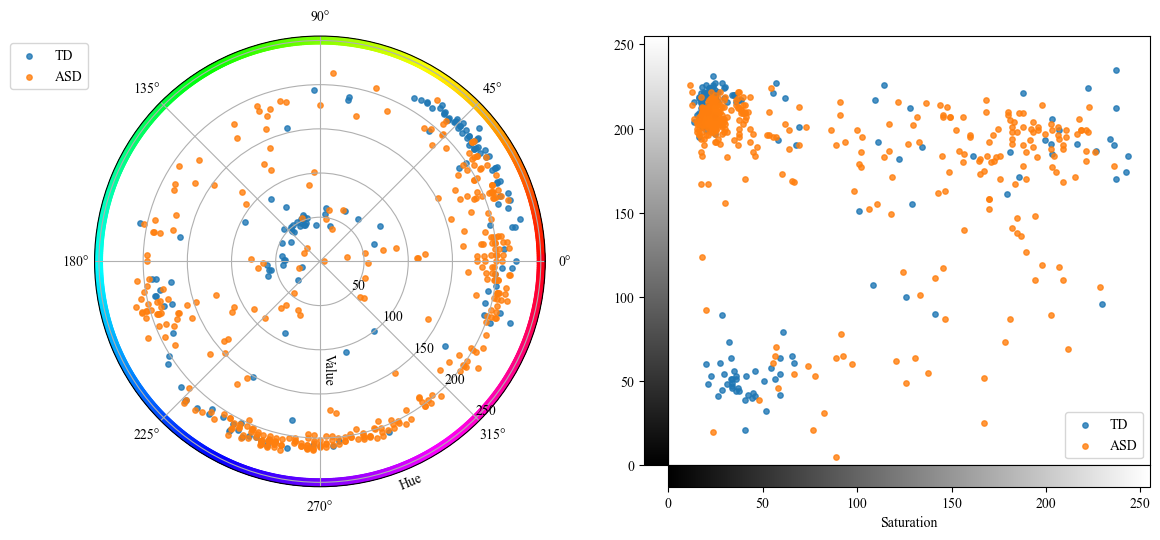

In [14]:
fig = plt.figure(figsize=(12,5.5))
ax1 = plt.subplot(121, projection='polar')
ax1.scatter(np.deg2rad(tones[1][:,0]*2),tones[1][:,2],s=15,alpha=0.8,label='TD')
ax1.scatter(np.deg2rad(tones[0][:,0]*2),tones[0][:,2],s=15,alpha=0.8,label='ASD')
norm1 = mpl.colors.Normalize(0, 2*np.pi)
xval1 = np.arange(0, 2*np.pi, 0.01)
yval1 = np.ones_like(xval1)*255
ax1.set_ylim((0,255))
cmap1 = plt.get_cmap('hsv')
ax1.scatter(xval1, yval1, c=xval1, s=150, cmap=cmap1, norm=norm1, linewidths=0)

#cbar = fig.colorbar(sm, ax=ax1,fraction=0.045, pad=0.06)

ax1.legend(bbox_to_anchor=(0,1))
ax1.set_rlabel_position(-45)
rlable_pos = -90
alable_pos = -(90+45)/2
ax1.text(np.radians(rlable_pos+5),ax1.get_rmax()/2-5,'Value',
        rotation=rlable_pos,ha='center',va='center')
ax1.text(np.radians(alable_pos),ax1.get_rmax()+15,'Hue',
        rotation=alable_pos+90,ha='center',va='center')

ax2 = plt.subplot(122)
ax2.scatter(tones[1][:,1], tones[1][:,2],s=15, alpha=0.8,label='TD')
ax2.scatter(tones[0][:,1], tones[0][:,2],s=15, alpha=0.8,label='ASD')
ax2.set_xlabel('Saturation')

ax2.set_ylim((0,255))
ax2.set_yticks([])
ax2.set_xticks([])
norm2 = mpl.colors.Normalize(0,255)
cmap2 = plt.get_cmap('gray')
sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('left', size='5%', pad=0)
cax2 = divider.append_axes('bottom', size='5%', pad=0)
cbar1 = fig.colorbar(sm,ax=ax2,cax=cax1, orientation='vertical')
cbar2 = fig.colorbar(sm,ax=ax2,cax=cax2, orientation='horizontal')
cax1.yaxis.set_ticks_position('left')
cbar2.set_label('Saturation')
ax2.legend()

plt.tight_layout()
fig.savefig('hsv.svg')

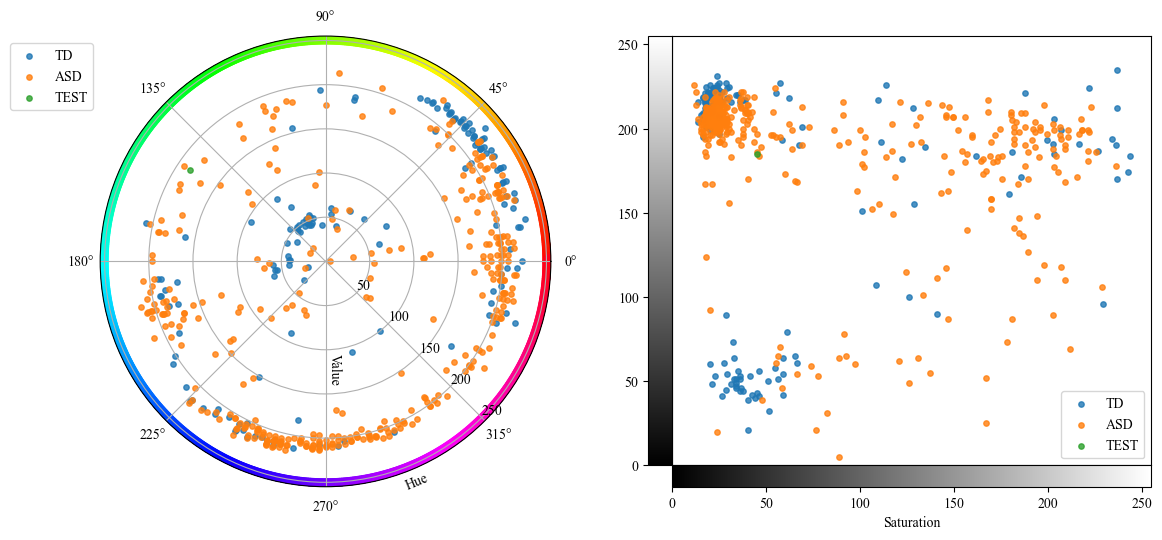

In [32]:
fig = plt.figure(figsize=(12,5.5))
ax1 = plt.subplot(121, projection='polar')
ax1.scatter(np.deg2rad(tones[1][:,0]*2),tones[1][:,2],s=15,alpha=0.8,label='TD')
ax1.scatter(np.deg2rad(tones[0][:,0]*2),tones[0][:,2],s=15,alpha=0.8,label='ASD')
ax1.scatter(np.deg2rad(73*2),185,s=15,alpha=0.8,label='TEST')
norm1 = mpl.colors.Normalize(0, 2*np.pi)
xval1 = np.arange(0, 2*np.pi, 0.01)
yval1 = np.ones_like(xval1)*255
ax1.set_ylim((0,255))
cmap1 = plt.get_cmap('hsv')
ax1.scatter(xval1, yval1, c=xval1, s=150, cmap=cmap1, norm=norm1, linewidths=0)

#cbar = fig.colorbar(sm, ax=ax1,fraction=0.045, pad=0.06)

ax1.legend(bbox_to_anchor=(0,1))
ax1.set_rlabel_position(-45)
rlable_pos = -90
alable_pos = -(90+45)/2
ax1.text(np.radians(rlable_pos+5),ax1.get_rmax()/2-5,'Value',
        rotation=rlable_pos,ha='center',va='center')
ax1.text(np.radians(alable_pos),ax1.get_rmax()+15,'Hue',
        rotation=alable_pos+90,ha='center',va='center')

ax2 = plt.subplot(122)
ax2.scatter(tones[1][:,1], tones[1][:,2],s=15, alpha=0.8,label='TD')
ax2.scatter(tones[0][:,1], tones[0][:,2],s=15, alpha=0.8,label='ASD')
ax2.scatter(37, 185,s=15, alpha=0.8,label='TEST')
ax2.set_xlabel('Saturation')

ax2.set_ylim((0,255))
ax2.set_yticks([])
ax2.set_xticks([])
norm2 = mpl.colors.Normalize(0,255)
cmap2 = plt.get_cmap('gray')
sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('left', size='5%', pad=0)
cax2 = divider.append_axes('bottom', size='5%', pad=0)
cbar1 = fig.colorbar(sm,ax=ax2,cax=cax1, orientation='vertical')
cbar2 = fig.colorbar(sm,ax=ax2,cax=cax2, orientation='horizontal')
cax1.yaxis.set_ticks_position('left')
cbar2.set_label('Saturation')
ax2.legend()

plt.tight_layout()

In [156]:
def CustomCmap(from_rgb,to_rgb):

    # from color r,g,b
    r1,g1,b1 = from_rgb

    # to color r,g,b
    r2,g2,b2 = to_rgb

    cdict = {'red': ((0, r1, r1),
                   (1, r2, r2)),
           'green': ((0, g1, g1),
                    (1, g2, g2)),
           'blue': ((0, b1, b1),
                   (1, b2, b2))}

    cmap = mpl.colors.LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

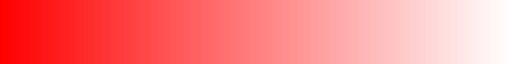

In [155]:
CustomCmap((1,0,0),(1,1,1))

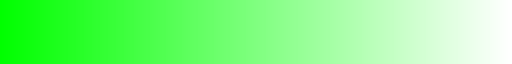

In [157]:
CustomCmap((0,1,0),(1,1,1))

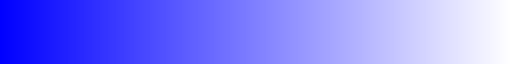

In [158]:
CustomCmap((0,0,1),(1,1,1))